In [ ]:
#Creating Data Model using Cassandra.
Create keyspace keyspace1 with replication = { 'class':'SimpleStratergy','replication_factor': '3' };
Create table dept ( dept_id int PRIMARY KEY, dept_name text, dept_loc text);
Create table emp ( emp_id int PRIMARY KEY, emp_name text, dept_id int,email text, phone text );
Insert Queries for dept table
Insert into dept (dept_id, dept_name, dept_loc) values (1001,'Accounts', 'Mumbai');
Insert into dept (dept_id, dept_name, dept_loc) values (1002,'Marketing', 'Delhi');
Insert into dept (dept_id, dept_name, dept_loc) values (1003, 'HR','Chennai');
Insert Queries for emp table
Insert into emp ( emp_id, emp_name, dept_id, email, phone ) values
(1001, 'ABCD',1001, 'abcd@company.com', '1122334455');
Insert into emp ( emp_id, emp_name, dept_id, email, phone ) values
(1002, 'DEFG',1001, 'defg@company.com', '2233445566');
Insert into emp ( emp_id, emp_name, dept_id, email, phone ) values
(1003, 'GHIJ',1002, 'ghij@company.com', '3344556677');
Insert into emp ( emp_id, emp_name, dept_id, email, phone ) values
(1004, 'JKLM',1002, 'jklm@company.com', '4455667788');
Insert into emp ( emp_id, emp_name, dept_id, email, phone ) values
(1005, 'MNOP',1003, 'mnop@company.com', '5566778899');
Insert into emp ( emp_id, emp_name, dept_id, email, phone ) values
(1006, 'MNOP',1003, 'mnop@company.com', '5566778844');
Select-all Query for emp table
select * from emp
Select-all Query for dept table
select * from dept
Update query for dept table where dept_id=1003 set dept_name is Human Resource
update dept set dept_name='Human Resource' where dept_id=1003;
Delete query for emp table where emp_id=1006 and Select-all from emp
delete from emp where emp_id=1006;
select * from emp


SyntaxError: ignored

In [ ]:
#2A. Text delimited CSV to HORUS format
import pandas as pd
sInputFileName = "/content/sample_data/country_code.csv"
InputData = pd.read_csv(sInputFileName, encoding="latin-1")
print("Input Data Values ===================================")
print(InputData)
print("=====================================================")
ProcessData = InputData
ProcessData.drop("ISO-2-CODE", axis=1, inplace=True)
ProcessData.drop("ISO-3-Code", axis=1, inplace=True)
ProcessData.rename(columns={"Country": "CountryName"}, inplace=True)
ProcessData.rename(columns={"ISO-M49": "CountryNumber"}, inplace=True)
ProcessData.set_index("CountryNumber", inplace=True)
ProcessData.sort_values("CountryName", axis=0, ascending=False,
inplace=True)
print("Process Data Values =================================")
print(ProcessData)
print("=====================================================")
OutputData = ProcessData
sOutputFileName = "HORUS-CSV-Country.csv"
OutputData.to_csv(sOutputFileName, index=False)
print("CSV to HORUS - Done")



Input Data Values ===================================
                       Country ISO-2-CODE ISO-3-Code  ISO-M49
0                  Afghanistan         AF        AFG        4
1                Aland Islands         AX        ALA      248
2                      Albania         AL        ALB        8
3                      Algeria         DZ        DZA       12
4               American Samoa         AS        ASM       16
..                         ...        ...        ...      ...
242  Wallis and Futuna Islands         WF        WLF      876
243             Western Sahara         EH        ESH      732
244                      Yemen         YE        YEM      887
245                     Zambia         ZM        ZMB      894
246                   Zimbabwe         ZW        ZWE      716

[247 rows x 4 columns]
Process Data Values =================================
                             CountryName
CountryNumber                           
716                             Zimbabwe
8

In [ ]:
#xml to horus
import pandas as pd
import xml.etree.ElementTree as ET
def df2xml(data):
  header = data.columns
  root = ET.Element("root")
  for row in range(data.shape[0]):
    entry = ET.SubElement(root, "entry")
    for index in range(data.shape[1]):
      schild = str(header[index])
      child = ET.SubElement(entry, schild)
    if str(data[schild][row]) != "nan":
      child.text = str(data[schild][row])
    else:
      child.text = "n/a"
      entry.append(child)
      result = ET.tostring(root)
    return result
def xml2df(xml_data):
  root = ET.XML(xml_data)
  all_records = []
  for i, child in enumerate(root):
    record = {}
  for subchild in child:
    record[subchild.tag] = subchild.text
    all_records.append(record)
  return pd.DataFrame(all_records)
sInputFileName = "/content/sample_data/country_code.csv"
InputData = open(sInputFileName).read()
print("=====================================================")
print("Input Data Values ===================================")
print("=====================================================")
print("=====================================================")
ProcessDataXML = InputData
ProcessData = xml2df(ProcessDataXML)
ProcessData.drop("ISO-2-CODE", axis=1, inplace=True)
ProcessData.drop("ISO-3-Code", axis=1, inplace=True)
ProcessData.rename(columns={"Country": "CountryName"}, inplace=True)
ProcessData.rename(columns={"ISO-M49": "CountryNumber"}, inplace=True)
ProcessData.set_index("CountryNumber", inplace=True)
ProcessData.sort_values("CountryName", axis=0, ascending=False,inplace=True)
print("=====================================================")
print("Process Data Values =================================")
print("=====================================================")
print(ProcessData)
print("=====================================================")
OutputData = ProcessData
sOutputFileName = "HORUS-XML-Country.csv"
OutputData.to_csv(sOutputFileName, index=False)
print("=====================================================")
print("XML to HORUS - Done")
print("=====================================================")



UnicodeDecodeError: ignored

In [ ]:
# json to horus
import pandas as pd
sInputFileName = "/content/sample_data/Country_Code.json"
InputData = pd.read_json(sInputFileName, orient="index",
encoding="latin-1")
print("Input Data Values ===================================")
print(InputData)
print("=====================================================")
ProcessData = InputData
ProcessData.drop("ISO-2-CODE", axis=1, inplace=True)
ProcessData.drop("ISO-3-Code", axis=1, inplace=True)
ProcessData.rename(columns={"Country": "CountryName"}, inplace=True)
ProcessData.rename(columns={"ISO-M49": "CountryNumber"}, inplace=True)
ProcessData.set_index("CountryNumber", inplace=True)
ProcessData.sort_values("CountryName", axis=0, ascending=False,
inplace=True)
print("Process Data Values =================================")
print(ProcessData)
print("=====================================================")
OutputData = ProcessData
sOutputFileName = "HORUS-JSON-Country.csv"
OutputData.to_csv(sOutputFileName, index=False)
print("JSON to HORUS - Done")


Input Data Values ===================================
                       Country ISO-2-CODE ISO-3-Code  ISO-M49
0                  Afghanistan         AF        AFG        4
1                Aland Islands         AX        ALA      248
2                      Albania         AL        ALB        8
3                      Algeria         DZ        DZA       12
4               American Samoa         AS        ASM       16
..                         ...        ...        ...      ...
242  Wallis and Futuna Islands         WF        WLF      876
243             Western Sahara         EH        ESH      732
244                      Yemen         YE        YEM      887
245                     Zambia         ZM        ZMB      894
246                   Zimbabwe         ZW        ZWE      716

[247 rows x 4 columns]
Process Data Values =================================
                             CountryName
CountryNumber                           
716                             Zimbabwe
8

In [ ]:
# mysql to horus
import pandas as pd
import sqlite3 as sq
sInputFileName = "/content/sample_data/utility.db" 
sInputTable = "Country_Code"
conn = sq.connect(sInputFileName)
sSQL = "select * FROM " + sInputTable + ";"
InputData=pd.read_sql_query(sSQL, conn)
print("Input Data Values ===================================")
print(InputData)
print("=====================================================")
ProcessData = InputData
ProcessData.drop("ISO-2-CODE", axis=1, inplace=True)
ProcessData.drop("ISO-3-Code", axis=1, inplace=True)
ProcessData.rename(columns={"Country": "CountryName"}, inplace=True)
ProcessData.rename(columns={"ISO-M49": "CountryNumber"}, inplace=True)
ProcessData.set_index("CountryNumber", inplace=True)
ProcessData.sort_values("CountryName", axis=0, ascending=False,
inplace=True)
print("Process Data Values =================================")
print(ProcessData)
print("=====================================================")
OutputData = ProcessData
sOutputFileName = "HORUS-CSV-Country.csv"
OutputData.to_csv(sOutputFileName, index=False)
print("Database to HORUS - Done")


Input Data Values ===================================
     index                    Country ISO-2-CODE ISO-3-Code  ISO-M49
0        0                Afghanistan         AF        AFG        4
1        1              Aland Islands         AX        ALA      248
2        2                    Albania         AL        ALB        8
3        3                    Algeria         DZ        DZA       12
4        4             American Samoa         AS        ASM       16
..     ...                        ...        ...        ...      ...
242    242  Wallis and Futuna Islands         WF        WLF      876
243    243             Western Sahara         EH        ESH      732
244    244                      Yemen         YE        YEM      887
245    245                     Zambia         ZM        ZMB      894
246    246                   Zimbabwe         ZW        ZWE      716

[247 rows x 5 columns]
Process Data Values =================================
               index                Coun

In [ ]:
#practical 3 utilities and auditing
# 3A fixers utilities
import string
import datetime as dt
print("\n#1 Removing leading or lagging spaces from a data entry")
baddata = " Data Science with too many spaces is bad!!! "
print(">", baddata, "<")
cleandata = baddata.strip()
print(">", cleandata, "<")
print("#2 Removing nonprintable characters from a data entry")
printable = set(string.printable)
baddata = "Data\x00Science with\x02 funny characters is \x10bad!!!"
cleandata = "".join(filter(lambda x: x in string.printable, baddata))
print("Bad Data : ", baddata)
print("Clean Data : ", cleandata)
print("# 3 Reformatting data entry to match specific formatting criteria.")
baddate = dt.date(2019, 10, 31)
baddata = format(baddate, "%Y-%m-%d")
gooddate = dt.datetime.strptime(baddata, "%Y-%m-%d")
gooddata = format(gooddate, "%d %B %Y")
print("Bad Data : ", baddata)
print("Good Data : ", gooddata)



#1 Removing leading or lagging spaces from a data entry
>  Data Science with too many spaces is bad!!!  <
> Data Science with too many spaces is bad!!! <
#2 Removing nonprintable characters from a data entry
Bad Data :  Data Science with funny characters is bad!!!
Clean Data :  DataScience with funny characters is bad!!!
# 3 Reformatting data entry to match specific formatting criteria.
Bad Data :  2019-10-31
Good Data :  31 October 2019


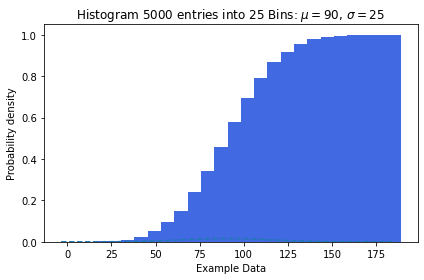

In [ ]:
# 3B. Data Binning or Bucketing
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
np.random.seed(0)
mu = 90 
sigma = 25 
x = mu + sigma * np.random.randn(5000)
num_bins = 25
fig, ax = plt.subplots()
n, bins, patches = ax.hist(
x,
num_bins,
color="royalblue",
density=1,
alpha=1,
align="right",
orientation="vertical",
cumulative=True,
)
y = stats.norm.pdf(bins, mu, sigma)
ax.plot(bins, y, "--")
ax.set_xlabel("Example Data")
ax.set_ylabel("Probability density")
sTitle = (
r"Histogram "
+ str(len(x))
+ " entries into "
+ str(num_bins)
+ " Bins: $\mu="
+ str(mu)
+ "$, $\sigma="
+ str(sigma)
+ "$"
)
ax.set_title(sTitle)
fig.tight_layout()
sPathFig = "DU-Histogram.png"
fig.savefig(sPathFig)
plt.plot()
plt.show()


In [ ]:
# 3C Averaging of data
import pandas as pd
InputFileName = "IP_DATA_CORE.csv"
OutputFileName = "Retrieve_Router_Location.csv"
Base = "VKHCG"
print("################################")
print("Working Base :", Base, " using ")
print("################################")
sFileName = Base + "/01-Vermeulen/00-RawData/" + InputFileName 
print("Loading :", sFileName)
IP_DATA_ALL = pd.read_csv(sFileName,header=0,low_memory=False,usecols=["Country", "Place Name", "Latitude", "Longitude"],encoding="latin-1",)
IP_DATA_ALL.rename(columns={"Place Name": "Place_Name"}, inplace=True)
AllData = IP_DATA_ALL[["Country", "Place_Name", "Latitude"]]
print(AllData)
MeanData = AllData.groupby(["Country","Place_Name"])["Latitude"].mean()
print(MeanData)



################################
Working Base : VKHCG  using 
################################
Loading : VKHCG/01-Vermeulen/00-RawData/IP_DATA_CORE.csv


FileNotFoundError: ignored

In [ ]:
#practical 4
#4A data processing using R
library(readr)
IP_DATA_ALL <- read_csv("D:/VKHCG/01-Vermeulen/00-RawData/IP_DATA_ALL.csv")
View(IP_DATA_ALL)
spec(IP_DATA_ALL)
library(tibble)
set_tidy_names(IP_DATA_ALL, syntactic = TRUE, quiet = FALSE)
sapply(IP_DATA_ALL_FIX, typeof)
library(data.table)
hist_country = data.table(Country = unique(IP_DATA_ALL_FIX[is.na(IP_DATA_ALL_FIX['Country']) == 0,] $Country))
setorder(hist_country, 'Country')
hist_country_with_id = rowid_to_column(hist_country, var ="RowIDCountry")
View(hist_country_fix)
IP_DATA_COUNTRY_FREQ = data.table(with(IP_DATA_ALL_FIX,table(Country)))
View(IP_DATA_COUNTRY_FREQ)
hist_latitude = data.table(Latitude =
unique(IP_DATA_ALL_FIX[is.na(IP_DATA_ALL_with_ID['Latitude']) ==0,]$Latitude))
setkeyv(hist_latitude, 'Latitude')
setorder(hist_latitude)
hist_latitude_with_id = rowid_to_column(hist_latitude, var = "RowID")
View(hist_latitude_with_id)
IP_DATA_Latitude_FREQ = data.table(with(IP_DATA_ALL_FIX, table(Latitude)))
View(IP_DATA_Latitude_FREQ)
sapply(IP_DATA_ALL_FIX[, 'Latitude'], min, na.rm = TRUE)
sapply(IP_DATA_ALL_FIX[, 'Country'], min, na.rm = TRUE)
sapply(IP_DATA_ALL_FIX[, 'Latitude'], max, na.rm = TRUE)
sapply(IP_DATA_ALL_FIX[, 'Country'], max, na.rm = TRUE)
sapply(IP_DATA_ALL_FIX[, 'Latitude'], mean, na.rm = TRUE)
sapply(IP_DATA_ALL_FIX[, 'Latitude'], median, na.rm = TRUE)
sapply(IP_DATA_ALL_FIX[, 'Latitude'], range, na.rm = TRUE)
sapply(IP_DATA_ALL_FIX[, 'Latitude'], quantile, na.rm = TRUE)
sapply(IP_DATA_ALL_FIX[, 'Latitude'], sd, na.rm = TRUE)
sapply(IP_DATA_ALL_FIX[, 'Longitude'], sd, na.rm = TRUE)


SyntaxError: ignored

In [ ]:
#4B Program to retrieve different attributes of data
import os
import pandas as pd
Base = "D:/VKHCG"
sFileName = Base + "/01-Vermeulen/00-RawData/IP_DATA_ALL.csv"
print("Loading:", sFileName)
IP_DATA_ALL = pd.read_csv(sFileName, header=0, low_memory=False, encoding="latin-1")
sFileDir = Base + "01-Vermeulen/01-Retrieve/01-EDS/02-Python"
if not os.path.exists(sFileDir):os.makedirs(sFileDir)
print("Rows", IP_DATA_ALL.shape[0])
print("Columns", IP_DATA_ALL.shape[1])
print("### Raw Data Set #####################################")
for i in range(0, len(IP_DATA_ALL.columns)):
print(IP_DATA_ALL.columns[i], type(IP_DATA_ALL.columns[i]))
print("### Fixed Data Set #####################################")
IP_DATA_ALL_FIX = IP_DATA_ALL
for i in range(0, len(IP_DATA_ALL.columns)):
cNameOld = IP_DATA_ALL_FIX.columns[i] + ""
cNameNew = cNameOld.strip().replace(" ", ".")
IP_DATA_ALL_FIX.columns.values[i] = cNameNew
print(IP_DATA_ALL.columns[i], type(IP_DATA_ALL.columns[i]))
print("Fixed Data Set with ID")
IP_DATA_ALL_with_ID = IP_DATA_ALL_FIX
IP_DATA_ALL_with_ID.index.names = ["RowID"]
sFileName2 = sFileDir + "/Retrieve_IP_DATA.csv"
IP_DATA_ALL_with_ID.to_csv(sFileName2, index=True, encoding="latin-1")


IndentationError: ignored

In [ ]:
#4C.Data Pattern

library(readr)
library(data.table)
FileName = paste0('C:/VKHCG/01-Vermeulen/00-RawData/IP_DATA_ALL.csv')
IP_DATA_ALL <- read.csv(FileName)
hist_country = data.table(Country = unique(IP_DATA_ALL$Country))
pattern_country = data.table(Country = hist_country$Country,
PatternCountry = hist_country$Country)
oldchar = c(letters, LETTERS)
newchar = replicate(length(oldchar), "A")
for (r in seq(nrow(pattern_country))) {
s = pattern_country[r,]$PatternCountry
for (c in seq(length(oldchar))) {
s = chartr(oldchar[c], newchar[c], s)
}
s = chartr(" ", "b", s)
s = chartr(".", "u", s)
pattern_country[r,]$PatternCountry = s
}
View(pattern_country)


SyntaxError: ignored

In [ ]:
#practical 5
# 5A. Perform error management on the given data using pandas package
#I. Drop the Columns Where All Elements Are Missing Values
import os
import sys
import pandas as pd
Base = "c:/VKHCG"
print("################################")
print("Working Base :", Base, " using ", sys.platform)
print("################################")
sInputFileName = "Good-or-Bad.csv"
sOutputFileName = "Good-or-Bad-01.csv"
Company = "01-Vermeulen"
Base = "VKHCG"
sFileDir = Base + "/" + Company + "/02-Assess/01-EDS/02-Python"
if not os.path.exists(sFileDir):os.makedirs(sFileDir)
sFileName = Base + "/" + Company + "/00-RawData/" + sInputFileName
print("Loading :", sFileName)
RawData = pd.read_csv(sFileName, header=0)
print("################################")
print("## Raw Data Values")
print("################################")
print(RawData)
print("################################")
print("## Data Profile")
print("################################")
print("Rows :", RawData.shape[0])
print("Columns :", RawData.shape[1])
print("################################")
sFileName = sFileDir + "/" + sInputFileName
RawData.to_csv(sFileName, index=False)
TestData = RawData.dropna(axis=1, how="all")
print("################################")
print("## Test Data Values")
print("################################")
print(TestData)
print("################################")
print("## Data Profile")
print("################################")
print("Rows :", TestData.shape[0])
print("Columns :", TestData.shape[1])
print("################################")
sFileName = sFileDir + "/" + sOutputFileName
TestData.to_csv(sFileName, index=False)
print("################################")
print("### Done!! #####################")
print("################################")

#II. Drop the Columns Where Any of the Elements Is Missing Values
import sys
import os
import pandas as pd
Base = "VKHCG"
sInputFileName = "Good-or-Bad.csv"
sOutputFileName = "Good-or-Bad-02.csv"
Company = "01-Vermeulen"
print("Working Base :", Base, " using ", sys.platform)
sFileDir = Base + "/" + Company + "/02-Assess/01-EDS/02-Python"
if not os.path.exists(sFileDir):
  os.makedirs(sFileDir)
sFileName = Base + "/" + Company + "/00-RawData/" + sInputFileName
print("Loading :", sFileName)
RawData = pd.read_csv(sFileName, header=0)
print("## Raw Data Values")
print(RawData)
print("## Data Profile")
print("Rows :", RawData.shape[0])
print("Columns :", RawData.shape[1])
sFileName = sFileDir + "/" + sInputFileName
RawData.to_csv(sFileName, index=False)
TestData = RawData.dropna(axis=1, how="any")
print("## Test Data Values")
print(TestData)
print("## Data Profile")
print("Rows :", TestData.shape[0])
print("Columns :", TestData.shape[1])
sFileName = sFileDir + "/" + sOutputFileName
TestData.to_csv(sFileName, index=False)

#III. Keep Only the Rows That Contain a Maximum of Two Missing Values
import sys
import os
import pandas as pd
sInputFileName = "Good-or-Bad.csv"
sOutputFileName = "Good-or-Bad-03.csv"
Company = "01-Vermeulen"
Base = "VKHCG"
print("Working Base :", Base, sys.platform)
sFileDir = Base + "/" + Company + "/02-Assess/01-EDS/02-Python"
if not os.path.exists(sFileDir):
  os.makedirs(sFileDir)
### Import Warehouse
sFileName = Base + "/" + Company + "/00-RawData/" + sInputFileName
print("Loading :", sFileName)
RawData = pd.read_csv(sFileName, header=0)
print("## Raw Data Values")
print(RawData)
print("## Data Profile")
print("Rows :", RawData.shape[0])
print("Columns :", RawData.shape[1])
sFileName = sFileDir + "/" + sInputFileName
RawData.to_csv(sFileName, index=False)
TestData = RawData.dropna(thresh=2)
print("## Test Data Values")
print(TestData)
print("## Data Profile")
print("Rows :", TestData.shape[0])
print("Columns :", TestData.shape[1])
sFileName = sFileDir + "/" + sOutputFileName
TestData.to_csv(sFileName, index=False)


################################
Working Base : c:/VKHCG  using  linux
################################
Loading : VKHCG/01-Vermeulen/00-RawData/Good-or-Bad.csv


FileNotFoundError: ignored

In [ ]:
#5B. Write Python / R program to create the network routing diagram from the given data on routers.

#assess-network-routing-company.py

import os
import sys
import pandas as pd
pd.options.mode.chained_assignment = None
Base = "VKHCG"
print("Working Base :", Base, sys.platform)
sInputFileName1 = "01-Retrieve/01-EDS/01-R/Retrieve_Country_Code.csv"
sInputFileName2 = "01-Retrieve/01-EDS/02-Python/Retrieve_Router_Location.csv"
sInputFileName3 = "01-Retrieve/01-EDS/01-R/Retrieve_IP_DATA.csv"
sOutputFileName = "Assess-Network-Routing-Company.csv"
Company = "01-Vermeulen"
sFileName = Base + "/" + Company + "/" + sInputFileName1
print("Loading :", sFileName)
CountryData = pd.read_csv(sFileName, header=0, low_memory=False, encoding="latin-1")
print("Loaded Country:", CountryData.columns.values)
print("Changed :", CountryData.columns.values)
CountryData.rename(columns={"Country": "Country_Name"}, inplace=True)
CountryData.rename(columns={"ISO-2-CODE": "Country_Code"}, inplace=True)
CountryData.drop("ISO-M49", axis=1, inplace=True)
CountryData.drop("ISO-3-Code", axis=1, inplace=True)
CountryData.drop("RowID", axis=1, inplace=True)
print("To :", CountryData.columns.values)
sFileName = Base + "/" + Company + "/" + sInputFileName2
print("Loading :", sFileName)
CompanyData = pd.read_csv(sFileName, header=0, low_memory=False, encoding="latin-1")
print("Loaded Company :", CompanyData.columns.values)
print("Changed :", CompanyData.columns.values)
CompanyData.rename(columns={"Country": "Country_Code"}, inplace=True)
print("To :", CompanyData.columns.values)
sFileName = Base + "/" + Company + "/" + sInputFileName3
print("Loading :", sFileName)
CustomerRawData = pd.read_csv(sFileName, header=0, low_memory=False, encoding="latin-1")
print("Loaded Customer :", CustomerRawData.columns.values)
CustomerData = CustomerRawData.dropna(axis=0, how="any")
print("Remove Blank Country Code")
print("Reduce Rows from", CustomerRawData.shape[0], " to ", CustomerData.shape[0])
print("Changed :", CustomerData.columns.values)
CustomerData.rename(columns={"Country": "Country_Code"}, inplace=True)
print("To :", CustomerData.columns.values)
print("Merge Company and Country Data")
CompanyNetworkData = pd.merge(CompanyData, CountryData, how="inner", on="Country_Code")
print("Change ", CompanyNetworkData.columns.values)
for i in CompanyNetworkData.columns.values:
  j = "Company_" + i
CompanyNetworkData.rename(columns={i: j}, inplace=True)
print("To ", CompanyNetworkData.columns.values)
sFileDir = Base + "/" + Company + "/02-Assess/01-EDS/02-Python"
if not os.path.exists(sFileDir):
  os.makedirs(sFileDir)
sFileName = sFileDir + "/" + sOutputFileName
print("Storing :", sFileName)
CompanyNetworkData.to_csv(sFileName, index=False, encoding="latin-1")


#assess-network-routing-customer.py
import os
import sys
import pandas as pd
pd.options.mode.chained_assignment = None
Base = "VKHCG"
print("Working Base :", Base, " using ", sys.platform)
sInputFileName = (Base+ "/01-Vermeulen/02-Assess/01-EDS/02-Python/Assess-Network-Routing-Company.csv")
sOutputFileName = "Assess-Network-Routing-Customer.gml"
Company = "01-Vermeulen"
sFileName = sInputFileName
print("Loading :", sFileName)
CustomerData=pd.read_csv(sFileName, header=0, low_memory=False, encoding="latin-1")
print("Loaded Country:", CustomerData.columns.values)
print(CustomerData.head())



In [ ]:
# 5C. Write a Python / R program to build directed acyclic graph

#assess-DAG-location.py
import os
import sys
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
Base = "VKHCG"
print("Working Base :", Base, " using ", sys.platform)
sInputFileName = "01-Retrive/01-EDS/02-Python/Retrieve_Router_Location.csv"
sOutputFileName1 = "Assess-DAG-Company-Country.png"
sOutputFileName2 = "Assess-DAG-Company-Country-Place.png"
Company = "01-Vermeulen"
sFileName = Base + "/" + Company + "/" + sInputFileName
print("Loading :", sFileName)
CompanyData = pd.read_csv(sFileName, header=0, low_memory=False,encoding="latin-1")
print("Loaded Company :", CompanyData.columns.values)
print(CompanyData)
print("Rows : ", CompanyData.shape[0])
G1 = nx.DiGraph()
G2 = nx.DiGraph()
for i in range(CompanyData.shape[0]):
  G1.add_node(CompanyData["Country"][i])
sPlaceName = CompanyData["Place_Name"][i] + "-" + CompanyData["Country"][i]
G2.add_node(sPlaceName)

for n1 in G1.nodes():
  for n2 in G1.nodes():
    if n1 != n2:
      print("Link :", n1, " to ", n2)
G1.add_edge(n1, n2)
print("Nodes of graph: ")
print(G1.nodes())
print("Edges of graph: ")
print(G1.edges())
sFileDir = Base + "/" + Company + "/02-Assess/01-EDS/02-Python"
if not os.path.exists(sFileDir):
  os.makedirs(sFileDir)
sFileName = sFileDir + "/" + sOutputFileName1
print("Storing :", sFileName)
nx.draw(
G1,
pos=nx.spectral_layout(G1),
edge_color="g",
with_labels=True,
node_size=8000,
font_size=12,
)
plt.savefig(sFileName)
plt.show() 
for n1 in G2.nodes():
  for n2 in G2.nodes():
   if n1 != n2:
    print("Link :", n1, " to ", n2)
G2.add_edge(n1, n2)
print("Nodes of graph: ")
print(G2.nodes())
print("Edges of graph: ")
print(G2.edges())

sFileDir = Base + "/" + Company + "/02-Assess/01-EDS/02-Python"
if not os.path.exists(sFileDir):
  os.makedirs(sFileDir)
sFileName = sFileDir + "/" + sOutputFileName2
print("Storing :", sFileName)
nx.draw(
G2,
pos=nx.spectral_layout(G2),
edge_color="b",
node_color="g",
with_labels=True,
node_size=8000,
font_size=12,
)
plt.savefig(sFileName) 
plt.show()


In [ ]:
#practical 6
# 6A. Build the time hub, links, and satellites

import sys
import os
from datetime import datetime
from datetime import timedelta
from pytz import timezone, all_timezones
import pandas as pd
import sqlite3 as sq
from pandas.io import sql
import uuid
pd.options.mode.chained_assignment = None
Base = "VKHCG"
print("Working Base :", Base, " using ", sys.platform)
Company = "01-Vermeulen"
InputDir = "00-RawData"
InputFileName = "VehicleData.csv"
sDataBaseDir = Base + "/" + Company + "/03-Process/SQLite"
if not os.path.exists(sDataBaseDir):
  os.makedirs(sDataBaseDir)
sDatabaseName = sDataBaseDir + "/Hillman.db"
conn1 = sq.connect(sDatabaseName)
sDataVaultDir = Base + "/88-DV"
if not os.path.exists(sDataBaseDir):
  os.makedirs(sDataBaseDir)
sDatabaseName = sDataVaultDir + "/datavault.db"
conn2 = sq.connect(sDatabaseName)
base = datetime(2018, 1, 1, 0, 0, 0)
numUnits = 10 * 365 * 24
date_list = [base - timedelta(hours=x) for x in range(0, numUnits)]
t = 0
for i in date_list:
  now_utc = i.replace(tzinfo=timezone("UTC"))
sDateTime = now_utc.strftime("%Y-%m-%d %H:%M:%S")
print(sDateTime)
sDateTimeKey = sDateTime.replace(" ", "-").replace(":", "-")
t += 1
IDNumber = str(uuid.uuid4())
TimeLine = [
("ZoneBaseKey", ["UTC"]),
("IDNumber", [IDNumber]),
("nDateTimeValue", [now_utc]),
("DateTimeValue", [sDateTime]),
("DateTimeKey", [sDateTimeKey]),]
if t == 1:
  TimeFrame = pd.DataFrame.from_dict(dict(TimeLine))
else:
  TimeRow = pd.DataFrame.from_dict(dict(TimeLine))
  TimeFrame = TimeFrame.append(TimeRow)
  TimeHub = TimeFrame[["IDNumber", "ZoneBaseKey", "DateTimeKey","DateTimeValue"]]
  TimeHubIndex = TimeHub.set_index(["IDNumber"], inplace=False)
  TimeFrame.set_index(["IDNumber"], inplace=True)
  sTable = "Process-Time"
  print("Storing :", sDatabaseName, " Table:", sTable)
  TimeHubIndex.to_sql(sTable, conn1, if_exists="replace")
  sTable = "Hub-Time"
  print("Storing :", sDatabaseName, " Table:", sTable)
  TimeHubIndex.to_sql(sTable, conn2, if_exists="replace")
  active_timezones = all_timezones
  z = 0
  for zone in active_timezones:
    t = 0
  for j in range(TimeFrame.shape[0]):
    now_date = TimeFrame["nDateTimeValue"][j]
    DateTimeKey = TimeFrame["DateTimeKey"][j]
    now_utc = now_date.replace(tzinfo=timezone("UTC"))
    sDateTime = now_utc.strftime("%Y-%m-%d %H:%M:%S")
    now_zone = now_utc.astimezone(timezone(zone))
    sZoneDateTime = now_zone.strftime("%Y-%m-%d %H:%M:%S")
    print(sZoneDateTime)
    t += 1
    z += 1
    IDZoneNumber = str(uuid.uuid4())
    TimeZoneLine=[("ZoneBaseKey", ["UTC"]),("IDZoneNumber", [IDZoneNumber]),("DateTimeKey", [DateTimeKey]),("UTCDateTimeValue", [sDateTime]),("Zone", [zone]),("DateTimeValue", [sZoneDateTime]),]
    if t == 1:
      TimeZoneFrame = pd.DataFrame.from_dict(dict(TimeZoneLine))
    else:
      TimeZoneRow = pd.DataFrame.from_dict(dict(TimeZoneLine))
      TimeZoneFrame = TimeZoneFrame.append(TimeZoneRow)
      TimeZoneFrameIndex = TimeZoneFrame.set_index(["IDZoneNumber"],
      inplace=False)
      sZone = zone.replace("/", "-").replace(" ", "")
      sTable = "Process-Time-" + sZone
      print("Storing :", sDatabaseName, " Table:", sTable)
      TimeZoneFrameIndex.to_sql(sTable, conn1, if_exists="replace")
      sTable = "Satellite-Time-" + sZone
      print("Storing :", sDatabaseName, " Table:", sTable)
      TimeZoneFrameIndex.to_sql(sTable, conn2, if_exists="replace")
      print("Vacuum Databases")
      sSQL = "VACUUM;"
      sql.execute(sSQL, conn1)
      sql.execute(sSQL, conn2)


In [ ]:
#6B. Write a program to load the vehicle data for Hillman Ltd into the data vault

import sys
import os
import pandas as pd
import sqlite3 as sq
from pandas.io import sql
import uuid
pd.options.mode.chained_assignment = None
Base = "VKHCG"
print("Working Base :", Base, " using ", sys.platform)
Company = "03-Hillman"
InputDir = "00-RawData"
InputFileName = "VehicleData.csv"
sDataBaseDir = Base + "/" + Company + "/03-Process/SQLite"
if not os.path.exists(sDataBaseDir):
  os.makedirs(sDataBaseDir)
sDatabaseName = sDataBaseDir + "/Hillman.db"
conn1 = sq.connect(sDatabaseName)
sDataVaultDir = Base + "/88-DV"
if not os.path.exists(sDataBaseDir):
  os.makedirs(sDataBaseDir)
  sDatabaseName = sDataVaultDir + "/datavault.db"
  conn2=sq.connect(sDatabaseName)
sFileName = Base + "/" + Company + "/" + InputDir + "/" + InputFileName
print("###########")
print("Loading :", sFileName)
VehicleRaw=pd.read_csv(sFileName, header=0, low_memory=False,encoding="latin-1")
sTable = "Process_Vehicles"
print("Storing :", sDatabaseName, " Table:", sTable)
VehicleRaw.to_sql(sTable, conn1, if_exists="replace")
VehicleRawKey = VehicleRaw[["Make", "Model"]].copy()
VehicleKey = VehicleRawKey.drop_duplicates()
VehicleKey["ObjectKey"] = VehicleKey.apply(lambda row: str("("+ str(row["Make"]).strip().replace(" ", "-").replace("/", "-").lower()+ ")-("+ (str(row["Model"]).strip().replace(" ", "-").replace(" ", "-").lower())+ ")"),axis=1,)
VehicleKey["ObjectType"] = VehicleKey.apply(lambda row: "vehicle",
axis=1)
VehicleKey["ObjectUUID"] = VehicleKey.apply(lambda row:
str(uuid.uuid4()), axis=1)
### Vehicle Hub
#
VehicleHub = VehicleKey[["ObjectType", "ObjectKey",
"ObjectUUID"]].copy()
VehicleHub.index.name = "ObjectHubID"
sTable = "Hub-Object-Vehicle"
print("Storing :", sDatabaseName, " Table:", sTable)
VehicleHub.to_sql(sTable, conn2, if_exists="replace")
### Vehicle Satellite
#
VehicleSatellite = VehicleKey[
["ObjectType", "ObjectKey", "ObjectUUID", "Make", "Model"]
].copy()
VehicleSatellite.index.name = "ObjectSatelliteID"
sTable = "Satellite-Object-Make-Model"
print("Storing :", sDatabaseName, " Table:", sTable)
VehicleSatellite.to_sql(sTable, conn2, if_exists="replace")
### Vehicle Dimension
sView = "Dim-Object"
print("Storing :", sDatabaseName, " View:", sView)
sSQL = "CREATE VIEW IF NOT EXISTS [" + sView + "] AS"
sSQL = sSQL + " SELECT DISTINCT"
sSQL = sSQL + " H.ObjectType,"
sSQL = sSQL + " H.ObjectKey AS VehicleKey,"
sSQL = sSQL + " TRIM(S.Make) AS VehicleMake,"
sSQL = sSQL + " TRIM(S.Model) AS VehicleModel"
sSQL = sSQL + " FROM"
sSQL = sSQL + " [Hub-Object-Vehicle] AS H"
sSQL = sSQL + " JOIN"
sSQL = sSQL + " [Satellite-Object-Make-Model] AS S"
sSQL = sSQL + " ON"
sSQL = sSQL + " H.ObjectType=S.ObjectType"
sSQL = sSQL + " AND"
sSQL = sSQL + " H.ObjectUUID=S.ObjectUUID;"
sql.execute(sSQL, conn2)
print("Loading :", sDatabaseName, " Table:", sView)
sSQL = " SELECT DISTINCT"
sSQL = sSQL + " VehicleMake,"
sSQL = sSQL + " VehicleModel"
sSQL = sSQL + " FROM"
sSQL = sSQL + " [" + sView + "]"
sSQL = sSQL + " ORDER BY"
sSQL = sSQL + " VehicleMake"
sSQL = sSQL + " AND"
sSQL = sSQL + " VehicleMake;"
DimObjectData = pd.read_sql_query(sSQL, conn2)
DimObjectData.index.name = "ObjectDimID"
DimObjectData.sort_values(["VehicleMake", "VehicleModel"],
inplace=True, ascending=True)
print(DimObjectData)
print("Vacuum Databases")
sSQL = "VACUUM;"
sql.execute(sSQL, conn1)
sql.execute(sSQL, conn2)
conn1.close()
conn2.close()
print("### Don


In [ ]:
#6C. Write a program to build relationship between Process-Location and Hub-Location

import sys
import os
import pandas as pd
import sqlite3 as sq
from pandas.io import sql
import uuid

Base = "VKHCG"
print("Working Base :", Base, " using ", sys.platform)

Company = "01-Vermeulen"
InputAssessGraphName = "Assess_All_Animals.gml"
EDSAssessDir = "02-Assess/01-EDS"
InputAssessDir = EDSAssessDir + "/02-Python"

sFileAssessDir = Base + "/" + Company + "/" + InputAssessDir
if not os.path.exists(sFileAssessDir):
  os.makedirs(sFileAssessDir)

sDataBaseDir = Base + "/" + Company + "/03-Process/SQLite"
if not os.path.exists(sDataBaseDir):
  os.makedirs(sDataBaseDir)

sDatabaseName = sDataBaseDir + "/Vermeulen.db"
conn1 = sq.connect(sDatabaseName)

sDataVaultDir = Base + "/88-DV"
if not os.path.exists(sDataBaseDir):
  os.makedirs(sDataBaseDir)

sDatabaseName = sDataVaultDir + "/datavault.db"
conn2 = sq.connect(sDatabaseName)
t = 0
tMax = 360 * 180

for Longitude in range(-180, 180, 10):
  for Latitude in range(-90, 90, 10):
    t += 1
    IDNumber = str(uuid.uuid4())
    LocationName = ("L"+ format(round(Longitude, 3) * 1000, "+07d")+ "-"+ format(round(Latitude, 3) * 1000, "+07d"))
    print("Create:", t, " of ", tMax, ":", LocationName)
    LocationLine = [("ObjectBaseKey", ["GPS"]),("IDNumber", [IDNumber]),("LocationNumber", [str(t)]),("LocationName", [LocationName]),("Longitude", [Longitude]),("Latitude", [Latitude]),]
  if t == 1:
       LocationFrame = pd.DataFrame.from_dict(dict(LocationLine))
  else: 
    LocationRow=pd.DataFrame.from_dict(dict(LocationLine))
    LocationFrame=LocationFrame.append(LocationRow)
    LocationHubIndex=LocationFrame.set_index(["IDNumber"],inplace=False)

sTable = "Process-Location"
print("Storing :", sDatabaseName, " Table:", sTable)
LocationHubIndex.to_sql(sTable, conn1, if_exists="replace")

sTable = "Hub-Location"
print("Storing :", sDatabaseName, " Table:", sTable)
LocationHubIndex.to_sql(sTable, conn2, if_exists="replace")

print("################")
print("Vacuum Databases")
sSQL = "VACUUM;"
sql.execute(sSQL, conn1)
sql.execute(sSQL, conn2)


In [ ]:
#Practical No: 07

#7A. Write a program to perform Transform Superstep on given data

import sys
import os
from datetime import datetime
from pytz import timezone
import pandas as pd
import sqlite3 as sq
import uuid
pd.options.mode.chained_assignment = None
################################################################
Base = "VKHCG"
print("################################")
print("Working Base :", Base, " using ", sys.platform)
print("################################")
################################################################
Company = "01-Vermeulen"
InputDir = "00-RawData"
InputFileName = "VehicleData.csv"
################################################################
sDataBaseDir = Base + "/" + Company + "/04-Transform/SQLite"
if not os.path.exists(sDataBaseDir):
  os.makedirs(sDataBaseDir)
################################################################
sDatabaseName = sDataBaseDir + "/Vermeulen.db"
conn1 = sq.connect(sDatabaseName)
################################################################
sDataVaultDir = Base + "/88-DV"
if not os.path.exists(sDataVaultDir):
  os.makedirs(sDataVaultDir)
################################################################
sDatabaseName = sDataVaultDir + "/datavault.db"
conn2 = sq.connect(sDatabaseName)
################################################################
sDataWarehouseDir = Base + "/99-DW"
if not os.path.exists(sDataWarehouseDir):
  os.makedirs(sDataWarehouseDir)
################################################################
sDatabaseName = sDataWarehouseDir + "/datawarehouse.db"
conn3 = sq.connect(sDatabaseName)
################################################################
print("\n#################################")
print("Time Category")
print("UTC Time")
BirthDateUTC = datetime(1960, 12, 20, 10, 15, 0)
BirthDateZoneUTC = BirthDateUTC.replace(tzinfo=timezone("UTC"))
BirthDateZoneStr = BirthDateZoneUTC.strftime("%Y-%m-%d %H:%M:%S")
BirthDateZoneUTCStr = BirthDateZoneUTC.strftime("%Y-%m-%d %H:%M:%S(%Z)(%z)")
print(BirthDateZoneUTCStr)
print("#################################")
print("Birth Date in Reykjavik :")
BirthZone = "Atlantic/Reykjavik"
BirthDate = BirthDateZoneUTC.astimezone(timezone(BirthZone))
BirthDateStr = BirthDate.strftime("%Y-%m-%d %H:%M:%S (%Z) (%z)")
BirthDateLocal = BirthDate.strftime("%Y-%m-%d %H:%M:%S")
print(BirthDateStr)
print("#################################")
################################################################
IDZoneNumber = str(uuid.uuid4())
sDateTimeKey = BirthDateZoneStr.replace(" ", "-").replace(":", "-")
TimeLine = [
("ZoneBaseKey", ["UTC"]),
("IDNumber", [IDZoneNumber]),
("DateTimeKey", [sDateTimeKey]),
("UTCDateTimeValue", [BirthDateZoneUTC]),
("Zone", [BirthZone]),
("DateTimeValue", [BirthDateStr]),
]
TimeFrame = pd.DataFrame.from_dict(dict(TimeLine))
################################################################
TimeHub = TimeFrame[["IDNumber", "ZoneBaseKey", "DateTimeKey",
"DateTimeValue"]]
TimeHubIndex = TimeHub.set_index(["IDNumber"], inplace=False)
################################################################
sTable = "Hub-Time-Gunnarsson"
print("\n#################################")
print("Storing :", sDatabaseName, "\n Table:", sTable)
print("\n#################################")
TimeHubIndex.to_sql(sTable, conn2, if_exists="replace")
sTable = "Dim-Time-Gunnarsson"
TimeHubIndex.to_sql(sTable, conn3, if_exists="replace")
################################################################
TimeSatellite = TimeFrame[["IDNumber", "DateTimeKey", "Zone",
"DateTimeValue"]]
TimeSatelliteIndex = TimeSatellite.set_index(["IDNumber"],
inplace=False)

################################################################
BirthZoneFix = BirthZone.replace(" ", "-").replace("/", "-")
sTable = "Satellite-Time-" + BirthZoneFix + "-Gunnarsson"
print("\n#################################")
print("Storing :", sDatabaseName, "\n Table:", sTable)
print("\n#################################")
TimeSatelliteIndex.to_sql(sTable, conn2, if_exists="replace")
sTable = "Dim-Time-" + BirthZoneFix + "-Gunnarsson"
TimeSatelliteIndex.to_sql(sTable, conn3, if_exists="replace")
################################################################
print("\n#################################")
print("Person Category")
FirstName = "Guðmundur"
LastName = "Gunnarsson"
print("Name:", FirstName, LastName)
print("Birth Date:", BirthDateLocal)
print("Birth Zone:", BirthZone)
print("UTC Birth Date:", BirthDateZoneStr)
print("#################################")
###############################################################
IDPersonNumber = str(uuid.uuid4())
PersonLine = [
("IDNumber", [IDPersonNumber]),
("FirstName", [FirstName]),
("LastName", [LastName]),
("Zone", ["UTC"]),
("DateTimeValue", [BirthDateZoneStr]),
]
PersonFrame = pd.DataFrame.from_dict(dict(PersonLine))
################################################################
TimeHub = PersonFrame
TimeHubIndex = TimeHub.set_index(["IDNumber"], inplace=False)
################################################################
sTable = "Hub-Person-Gunnarsson"
print("\n#################################")
print("Storing :", sDatabaseName, "\n Table:", sTable)
print("\n#################################")
TimeHubIndex.to_sql(sTable, conn2, if_exists="replace")
sTable = "Dim-Person-Gunnarsson"
TimeHubIndex.to_sql(sTable, conn3, if_exists="replace")


In [ ]:
#7B. Write a program to build dimension Person, dimension Time, and factPersonBornAtTime

import os
import sqlite3 as sq
import sys
import uuid
from datetime import datetime
import pandas as pd
from pytz import timezone
pd.options.mode.chained_assignment = None
################################################################
Base = "VKHCG"
print("################################")
print("Working Base :", Base, " using ", sys.platform)
print("################################")
################################################################
Company = "01-Vermeulen"
################################################################
sDataBaseDir = Base + "/" + Company + "/04-Transform/SQLite"
if not os.path.exists(sDataBaseDir):
  os.makedirs(sDataBaseDir)
################################################################
sDatabaseName = sDataBaseDir + "/Vermeulen.db"
conn1 = sq.connect(sDatabaseName)
################################################################
sDataWarehousetDir = Base + "/99-DW"
if not os.path.exists(sDataWarehousetDir):
  os.makedirs(sDataWarehousetDir)
################################################################
sDatabaseName = sDataWarehousetDir + "/datawarehouse.db"
conn2 = sq.connect(sDatabaseName)
################################################################
print("\n#################################")
print("Time Dimension")
BirthZone = "Atlantic/Reykjavik"
BirthDateUTC = datetime(1960, 12, 20, 10, 15, 0)
BirthDateZoneUTC = BirthDateUTC.replace(tzinfo=timezone("UTC"))
BirthDateZoneStr = BirthDateZoneUTC.strftime("%Y-%m-%d %H:%M:%S")
BirthDateZoneUTCStr = BirthDateZoneUTC.strftime("%Y-%m-%d %H:%M:%S(%Z)(%z)")
BirthDate = BirthDateZoneUTC.astimezone(timezone(BirthZone))
BirthDateStr = BirthDate.strftime("%Y-%m-%d %H:%M:%S (%Z) (%z)")
BirthDateLocal = BirthDate.strftime("%Y-%m-%d %H:%M:%S")
################################################################
IDTimeNumber = str(uuid.uuid4())
TimeLine = [
("TimeID", [IDTimeNumber]),
("UTCDate", [BirthDateZoneStr]),
("LocalTime", [BirthDateLocal]),
("TimeZone", [BirthZone]),
]
TimeFrame = pd.DataFrame.from_dict(dict(TimeLine))
################################################################
DimTime = TimeFrame
DimTimeIndex = DimTime.set_index(["TimeID"], inplace=False)
################################################################
sTable = "Dim-Time"
print("\n#################################")
print("Storing :", sDatabaseName, "\n Table:", sTable)
print("\n#################################")
DimTimeIndex.to_sql(sTable, conn1, if_exists="replace")
DimTimeIndex.to_sql(sTable, conn2, if_exists="replace")
################################################################
print("\n#################################")
print("Dimension Person")
print("\n#################################")
FirstName = "Guðmundur"
LastName = "Gunnarsson"
###############################################################
IDPersonNumber = str(uuid.uuid4())
PersonLine = [
("PersonID", [IDPersonNumber]),
("FirstName", [FirstName]),
("LastName", [LastName]),
("Zone", ["UTC"]),
("DateTimeValue", [BirthDateZoneStr]),
]
PersonFrame = pd.DataFrame.from_dict(dict(PersonLine))
################################################################
DimPerson = PersonFrame
DimPersonIndex = DimPerson.set_index(["PersonID"], inplace=False)
################################################################
sTable = "Dim-Person"
print("\n#################################")
print("Storing :", sDatabaseName, "\n Table:", sTable)
print("\n#################################")
DimPersonIndex.to_sql(sTable, conn1, if_exists="replace")
DimPersonIndex.to_sql(sTable, conn2, if_exists="replace")
################################################################
print("\n#################################")
print("Fact - Person - time")
print("\n#################################")
IDFactNumber = str(uuid.uuid4())
PersonTimeLine = [
("IDNumber", [IDFactNumber]),
("IDPersonNumber", [IDPersonNumber]),
("IDTimeNumber", [IDTimeNumber]),
]
PersonTimeFrame = pd.DataFrame.from_dict(dict(PersonTimeLine))
################################################################
FctPersonTime = PersonTimeFrame
FctPersonTimeIndex = FctPersonTime.set_index(["IDNumber"],
inplace=False)
################################################################
sTable = "Fact-Person-Time"
print("\n#################################")
print("Storing :", sDatabaseName, "\n Table:", sTable)
print("\n#################################")
FctPersonTimeIndex.to_sql(sTable, conn1, if_exists="replace")
FctPersonTimeIndex.to_sql(sTable, conn2, if_exists="replace")
################################################################


In [ ]:
#Practical No: 08
#8A. Write a program to perform horizontal-style slicing orsubsetting of the data warehouse

import sys
import os
import pandas as pd
import sqlite3 as sq
################################################################
Base = "VKHCG"
print("################################")
print("Working Base :", Base, " using ", sys.platform)
print("################################")
################################################################
################################################################
Company = "01-Vermeulen"
################################################################
sDataWarehouseDir = Base + "/99-DW"
if not os.path.exists(sDataWarehouseDir):
  os.makedirs(sDataWarehouseDir)
################################################################
sDatabaseName = sDataWarehouseDir + "/datawarehouse.db"
conn1 = sq.connect(sDatabaseName)
################################################################
sDatabaseName = sDataWarehouseDir + "/datamart.db"
conn2 = sq.connect(sDatabaseName)
################################################################
print("################")
sTable = "Dim-BMI"
print("Loading :", sDatabaseName, " Table:", sTable)
sSQL = "SELECT * FROM [Dim-BMI];"
PersonFrame0 = pd.read_sql_query(sSQL, conn1)
print("################")
sTable = "Dim-BMI"
print("Loading :", sDatabaseName, " Table:", sTable)
sSQL = "SELECT PersonID, \Height,\Weight,\bmi,\Indicator\FROM [Dim-BMI]\WHERE \Height > 1.5 \and Indicator = 1 \ORDER BY \Height,\Weight;"

################################################################
################################################################
sTable = "Dim-BMI"
print("\n#################################")
print("Storing :", sDatabaseName, "\n Table:", sTable)
print("\n#################################")
# DimPersonIndex.to_sql(sTable, conn2, if_exists="replace")
################################################################
print("################")
sTable = "Dim-BMI"
print("Loading :", sDatabaseName, " Table:", sTable)
sSQL = "SELECT * FROM [Dim-BMI];"
PersonFrame2 = pd.read_sql_query(sSQL, conn2)
print("Full Data Set (Rows):", PersonFrame0.shape[0])
print("Full Data Set (Columns):", PersonFrame0.shape[1])
print("Horizontal Data Set (Rows):", PersonFrame2.shape[0])
print("Horizontal Data Set (Columns):", PersonFrame2.shape[1])


In [ ]:
#8B. Write a program to perform association rule mining on the given data

import os
import sys
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
################################################################
Base = "VKHCG"
print("################################")
print("Working Base :", Base, " using ", sys.platform)
print("################################")
Company = "01-Vermeulen"
InputFileName = "Online-Retail-Billboard.xlsx"
EDSAssessDir = "02-Assess/01-EDS"
InputAssessDir = EDSAssessDir + "/02-Python"
################################################################
sFileAssessDir = Base + "/" + Company + "/" + InputAssessDir
if not os.path.exists(sFileAssessDir):
  os.makedirs(sFileAssessDir)
################################################################
sFileName = Base + "/" + Company + "/00-RawData/" + InputFileName
################################################################
df = pd.read_excel(sFileName)
print(df.shape)
################################################################
df["Description"] = df["Description"].str.strip()
df.dropna(axis=0, subset=["InvoiceNo"], inplace=True)
df["InvoiceNo"] = df["InvoiceNo"].astype("str")
df = df[~df["InvoiceNo"].str.contains("C")]
basket = (
df[df["Country"] == "France"]
.groupby(["InvoiceNo", "Description"])["Quantity"]
.sum()
.unstack()
.reset_index()
.fillna(0)
.set_index("InvoiceNo"))
################################################################
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1
################################################################
basket_sets = basket.applymap(encode_units)
basket_sets.drop("POSTAGE", inplace=True, axis=1)
frequent_itemsets = apriori(basket_sets, min_support=0.07,
use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift",
min_threshold=1)
print(rules.head())
rules[(rules["lift"] >= 6) & (rules["confidence"] >= 0.8)]
################################################################
sProduct1 = "ALARM CLOCK BAKELIKE GREEN"
print(sProduct1)
print(basket[sProduct1].sum())
sProduct2 = "ALARM CLOCK BAKELIKE RED"
print(sProduct2)
print(basket[sProduct2].sum())
################################################################
basket2 = (df[df["Country"] == "Germany"]
.groupby(["InvoiceNo", "Description"])["Quantity"]
.sum()
.unstack()
.reset_index()
.fillna(0)
.set_index("InvoiceNo"))
basket_sets2 = basket2.applymap(encode_units)
basket_sets2.drop("POSTAGE", inplace=True, axis=1)
frequent_itemsets2 = apriori(basket_sets2, min_support=0.05,
use_colnames=True)
rules2 = association_rules(frequent_itemsets2, metric="lift",
min_threshold=1)
print(rules2[(rules2["lift"] >= 4) & (rules2["confidence"] >= 0.5)])


In [ ]:
#8C. Write a program to create a Network Routing Diagram using given data.
import sys
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
################################################################
pd.options.mode.chained_assignment = None
################################################################
Base = "VKHCG"
################################################################
print("################################")
print("Working Base :", Base, " using ", sys.platform)
print("################################")
################################################################
sInputFileName = "02-Assess/01-EDS/02-Python/Assess-Network-Routing-Company.csv"
################################################################
sOutputFileName1 = "05-Organise/01-EDS/02-Python/Organise-Network-Routing-Company.gml"
sOutputFileName2 = "05-Organise/01-EDS/02-Python/Organise-Network-Routing-Company.png"
Company = "01-Vermeulen"
################################################################
################################################################
### Import Country Data
################################################################
sFileName = Base + "/" + Company + "/" + sInputFileName
print("################################")
print("Loading :", sFileName)
print("################################")
CompanyData = pd.read_csv(sFileName, header=0, low_memory=False,
encoding="latin-1")
print("################################")
################################################################
print(CompanyData.head())
print(CompanyData.shape)
################################################################
G = nx.Graph()
for i in range(CompanyData.shape[0]):
  for j in range(CompanyData.shape[0]):
    Node0 = CompanyData["Company_Country_Name"][i]
    Node1 = CompanyData["Company_Country_Name"][j]

if Node0 != Node1:
  G.add_edge(Node0, Node1)
for i in range(CompanyData.shape[0]):
  Node0 = CompanyData["Company_Country_Name"][i]
  Node1 = (
  CompanyData["Company_Place_Name"][i]
  + "("
  + CompanyData["Company_Country_Name"][i]
  + ")"
  )
if Node0 != Node1:
  G.add_edge(Node0, Node1)
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
################################################################
sFileName = Base + "/" + Company + "/" + sOutputFileName1
print("################################")
print("Storing :", sFileName)
print("################################")
nx.write_gml(G, sFileName)
################################################################
sFileName = Base + "/" + Company + "/" + sOutputFileName2
print("################################")
print("Storing Graph Image:", sFileName)
print("################################")
plt.figure(figsize=(15, 15))
pos = nx.spectral_layout(G, dim=2)
nx.draw_networkx_nodes(G, pos, node_color="k", node_size=10,
alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color="r", arrows=False,
style="dashed")
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif", font_color="b")
plt.axis("off")
plt.savefig(sFileName, dpi=600)
plt.show()


In [ ]:
#Practical No: 09
#Aim: Generating Data
#9A. Write a program to perform Report Superstep on Vermeulen PLC

import sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
################################################################
pd.options.mode.chained_assignment = None
################################################################
Base = "D:/VKHCG"
################################################################
print("################################")
print("Working Base :", Base, " using ", sys.platform)
print("################################")
################################################################
sInputFileName = "02-Assess/01-EDS/02-Python/Assess-Network-Routing-
Customer.csv"
################################################################
sOutputFileName1 = "06-Report/01-EDS/02-Python/Report-Network-Routing-
Customer.gml"
sOutputFileName2 = "06-Report/01-EDS/02-Python/Report-Network-Routing-
Customer.png"
Company = "01-Vermeulen"
################################################################
################################################################
### Import Country Data
################################################################
sFileName = Base + "/" + Company + "/" + sInputFileName
print("################################")
print("Loading :", sFileName)
print("################################")
CustomerDataRaw = pd.read_csv(sFileName, header=0, low_memory=False,
encoding="latin-1")
CustomerData = CustomerDataRaw.head(100)
print("Loaded Country:", CustomerData.columns.values)
print("################################")
################################################################
print(CustomerData.head())
################################################################
G = nx.Graph()
for i in range(CustomerData.shape[0]):
for j in range(CustomerData.shape[0]):
Node0 = CustomerData["Customer_Country_Name"][i]
Node1 = CustomerData["Customer_Country_Name"][j]
if Node0 != Node1:
G.add_edge(Node0, Node1)
for i in range(CustomerData.shape[0]):
Node0 = CustomerData["Customer_Country_Name"][i]
Node1 = (
CustomerData["Customer_Place_Name"][i]
+ "("
+ CustomerData["Customer_Country_Name"][i]
+ ")"
)
Node2 = (
"("
+ "{:.9f}".format(CustomerData["Customer_Latitude"][i])
+ ")\
("
+ "{:.9f}".format(CustomerData["Customer_Longitude"][i])
+ ")"
)
if Node0 != Node1:
G.add_edge(Node0, Node1)
if Node1 != Node2:
G.add_edge(Node1, Node2)
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
################################################################
sFileName = Base + "/" + Company + "/" + sOutputFileName1
print("################################")
print("Storing :", sFileName)
print("################################")
nx.write_gml(G, sFileName)
################################################################
sFileName = Base + "/" + Company + "/" + sOutputFileName2
print("################################")
print("Storing Graph Image:", sFileName)
print("################################")
plt.figure(figsize=(25, 25))
pos = nx.spectral_layout(G, dim=2)
nx.draw_networkx_nodes(G, pos, node_color="k", node_size=10,
alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color="r", arrows=False,
style="dashed")

nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-
serif", font_color="b")
plt.axis("off")
plt.savefig(sFileName, dpi=600)
plt.show()


In [ ]:
#9B. Write a program for Hillman Ltd to convert all numbers on thesides of containers into digits.

from time import time
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import offsetbox
from sklearn import (datasets, decomposition, discriminant_analysis,
ensemble,
manifold, random_projection)
digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.targetō
n_samples, n_features = X.shape
n_neighbors = 30
def plot_embedding(X, title=None):
x_min, x_max = np.min(X, 0), np.max(X, 0)
X = (X - x_min) / (x_max - x_min)
plt.figure(figsize=(10, 10))
ax = plt.subplot(111)
for i in range(X.shape[0]):
plt.text(
X[i, 0],
X[i, 1],
str(digits.target[i]),
color=plt.cm.Set1(y[i] / 10.0),
fontdict={"weight": "bold", "size": 9},
)
if hasattr(offsetbox, "AnnotationBbox"):
# only print thumbnails with matplotlib > 1.0
shown_images = np.array([[1.0, 1.0]]) # just something big
for i in range(digits.data.shape[0]):
dist = np.sum((X[i] - shown_images) ** 2, 1)
if np.min(dist) < 4e-3:
# don't show points that are too close
continue
shown_images = np.r_[shown_images, [X[i]]]
imagebox = offsetbox.AnnotationBbox(
offsetbox.OffsetImage(digits.images[i],
cmap=plt.cm.gray_r), X[i]
)
ax.add_artist(imagebox)
plt.xticks([]), plt.yticks([])
if title is not None:
plt.title(title)

n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
ix = 10 * i + 1
for j in range(n_img_per_row):
iy = 10 * j + 1
img[ix : ix + 8, iy : iy + 8] = X[i * n_img_per_row +
j].reshape((8, 8))
plt.figure(figsize=(10, 10))
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title("A selection from the 64-dimensional digits dataset")
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2,
random_state=42)
X_projected = rp.fit_transform(X)
plot_embedding(X_projected, "Random Projection of the digits")
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(
X_pca, "Principal Components projection of the digits (time
%.2fs)" % (time() - t0)
)
print("Computing Linear Discriminant Analysis projection")
X2 = X.copy()
X2.flat[:: X.shape[1] + 1] += 0.01 # Make X invertible
t0 = time()
X_lda =
discriminant_analysis.LinearDiscriminantAnalysis(n_components=2).fit_t
ransform(
X2, y
)
plot_embedding(
X_lda, "Linear Discriminant projection of the digits (time %.2fs)"
% (time() - t0)
)
print("Computing Isomap embedding")
t0 = time()
X_iso = manifold.Isomap(n_neighbors, n_components=2).fit_transform(X)
print("Done.")
plot_embedding(X_iso, "Isomap projection of the digits (time %.2fs)" %
(time() - t0))
print("Computing LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
method="standard")
t0 = time()
X_lle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(
X_lle, "Locally Linear Embedding of the digits (time %.2fs)" %
(time() - t0)
)
print("Computing modified LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
method="modified")
t0 = time()
X_mlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(
X_mlle,
"Modified Locally Linear Embedding of the digits (time %.2fs)" %
(time() - t0),
)
print("Computing Hessian LLE embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
method="hessian")
t0 = time()
X_hlle = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(
X_hlle,
"Hessian Locally Linear Embedding of the digits (time %.2fs)" %
(time() - t0),
)
print("Computing LTSA embedding")
clf = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
method="ltsa")
t0 = time()
X_ltsa = clf.fit_transform(X)
print("Done. Reconstruction error: %g" % clf.reconstruction_error_)
plot_embedding(
X_ltsa, "Local Tangent Space Alignment of the digits (time %.2fs)"
% (time() - t0)
)
print("Computing MDS embedding")
clf = manifold.MDS(n_components=2, n_init=1, max_iter=100)
t0 = time()
X_mds = clf.fit_transform(X)
print("Done. Stress: %f" % clf.stress_)
plot_embedding(X_mds, "MDS embedding of the digits (time %.2fs)" %
(time() - t0))
print("Computing Totally Random Trees embedding")
hasher = ensemble.RandomTreesEmbedding(n_estimators=200,
random_state=0, max_depth=5)
t0 = time()
X_transformed = hasher.fit_transform(X)
pca = decomposition.TruncatedSVD(n_components=2)
X_reduced = pca.fit_transform(X_transformed)
plot_embedding(
X_reduced, "Random forest embedding of the digits (time %.2fs)" %
(time() - t0)
)
print("Computing Spectral embedding")
embedder = manifold.SpectralEmbedding(
n_components=2, random_state=0, eigen_solver="arpack"
)
t0 = time()
X_se = embedder.fit_transform(X)
plot_embedding(X_se, "Spectral embedding of the digits (time %.2fs)" %
(time() - t0))
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne, "t-SNE embedding of the digits (time %.2fs)" %
(time() - t0))
plt.show()


In [ ]:
#9C. Write a program to perform Kernel Density
import sys
import pandas as pd
import matplotlib as ml
import numpy as np
from matplotlib import pyplot as plt
################################################################
Base = "D:/VKHCG"
print("################################")
print("Working Base :", Base, " using ", sys.platform)
print("################################")
################################################################
ml.style.use("ggplot")
fig1 = plt.figure(figsize=(10, 10))
ser = pd.Series(np.random.randn(1000))
ser.plot(figsize=(10, 10), kind="kde")
sPicNameOut1 = Base + "/01-Vermeulen/06-Report/01-EDS/02-
Python/kde.png"
plt.savefig(sPicNameOut1, dpi=600)
plt.tight_layout()
plt.show()
fig2 = plt.figure(figsize=(10, 10))
from pandas.plotting import scatter_matrix
df = pd.DataFrame(
np.random.randn(1000, 5), columns=["Y2014", "Y2015", "Y2016",
"Y2017", "Y2018"]
)
scatter_matrix(df, alpha=0.2, figsize=(10, 10), diagonal="kde")
sPicNameOut2 = Base + "/01-Vermeulen/06-Report/01-EDS/02-
Python/scatter_matrix.png"
plt.savefig(sPicNameOut2, dpi=600)
plt.tight_layout()
plt.show()


In [ ]:
9D. Write a program to plot Lag Plot, Autocorrelation, and Bootstrap Plot
import sys
import pandas as pd
from matplotlib import style
from matplotlib import pyplot as plt
import numpy as np
################################################################
Base = "D:/VKHCG"
print("################################")
print("Working Base :", Base, " using ", sys.platform)
print("################################")
################################################################
style.use("ggplot")
from pandas.plotting import lag_plot
plt.figure(figsize=(10, 10))
data = pd.Series(
0.1 * np.random.rand(1000)
+ 0.9 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000))
)
lag_plot(data)
sPicNameOut1 = Base + "/01-Vermeulen/06-Report/01-EDS/02-
Python/lag_plot.png"
plt.savefig(sPicNameOut1, dpi=600)
plt.tight_layout()
plt.show()
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(10, 10))
data = pd.Series(
0.7 * np.random.rand(1000)
+ 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000))
)
autocorrelation_plot(data)
sPicNameOut2 = (
Base + "/01-Vermeulen/06-Report/01-EDS/02-
Python/autocorrelation_plot.png"
)

plt.savefig(sPicNameOut2, dpi=600)
plt.tight_layout()
plt.show()
from pandas.plotting import bootstrap_plot
data = pd.Series(np.random.rand(1000))
plt.figure(figsize=(10, 10))
bootstrap_plot(data, size=50, samples=500, color="grey")
sPicNameOut3 = Base + "/01-Vermeulen/06-Report/01-EDS/02-
Python/bootstrap_plot.png"
plt.savefig(sPicNameOut3, dpi=600)
plt.tight_layout()
plt.show()
